# Dealing with Skewness and Scaling on Medical Data

In this notebook, I will:
- Handle skewed medical cost data by applying transformations (log, Box-Cox)
- Normalize features like children and charges to prepare the dataset for analysis.

For this project, I will be using this dataset from Kaggle: https://www.kaggle.com/code/samerhendawy/medical-insurance-cost-eda-prediction


In [64]:
# Start with importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox
from sklearn.preprocessing import PowerTransformer, StandardScaler, MinMaxScaler

In [65]:
# Reading the data set into a data frame
df = pd.read_csv('insurance.csv')

First lets get some information about the dataset

In [66]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [67]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [69]:
#Checking for Duplicates
df.duplicated().sum()

np.int64(1)

Because we are not missing any values and only have one duplicate, we can move on to visualizing skewness of columns.

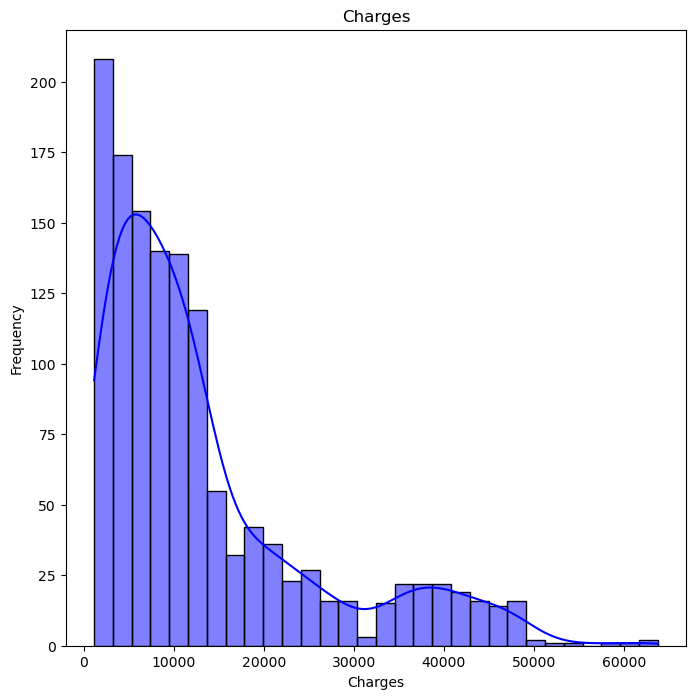

In [70]:
# First, I will make a graph showing the frequency of insurance charges in the dataset.
plt.figure(figsize=(8,8))
sns.histplot(df['charges'], kde=True, color='blue') #kde is the smooth line
plt.title('Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

What can we gather from this graph?
- Frequency is the number of people who got charged, and charges is the amount of money a particular person got charged. For example, the frequency of people being charged 10,000 is much greater than that of those who were charged 40,000.
- The graph is right-skewed because most of the data is to the left (charges under 15,000), and outliers (60,000+) stretch the distribution to the right.

In [71]:
# If skewness > 1, then right-skewed, if skewness < -1, then left-skewed.
skew_val = df['charges'].skew()
print('Skewness:', skew_val)

Skewness: 1.5158796580240388


When dealing with right-skewed data, one common transformation to implement is the log transform. This transformation compresses and devalues large values (outliers), much more than small ones, and works well if skewness is higher than 1, as in our case.

In [72]:
# making a new column that went through log transform and creating a graph for it.
df['log_charges'] = np.log(df['charges'])

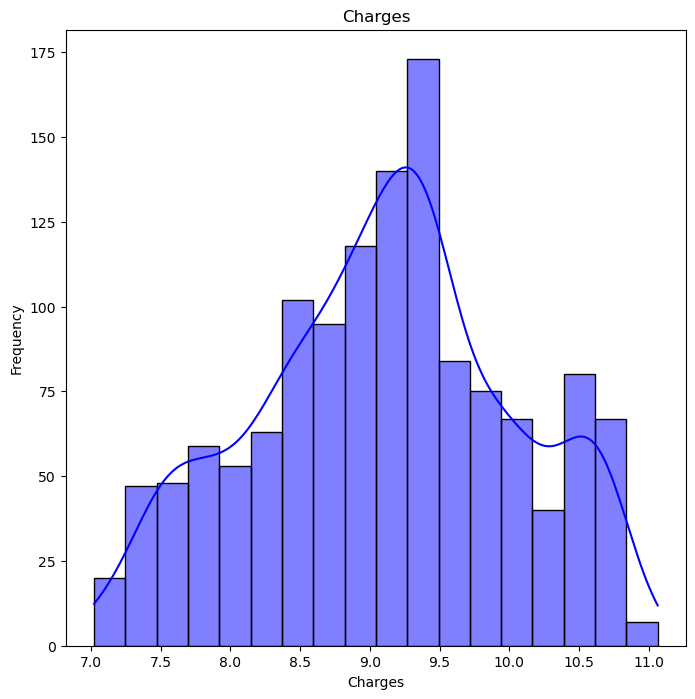

In [73]:
plt.figure(figsize=(8,8))
sns.histplot(df['log_charges'], kde=True, color='blue') #kde is the smooth line
plt.title('Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

In [74]:
skew_val2 = df['log_charges'].skew()
print('Skewness:', skew_val2)

Skewness: -0.09009752473024582


As we can see now, our data is much more symmetrical, and our skewness value is almost 0, meaning that it is not skewed. Now, let's do the same thing for the children column and use the Box-Cox transformation. It is important to remember that for Box-Cox, we need all values to be positive.

Text(0, 0.5, 'Frequency')

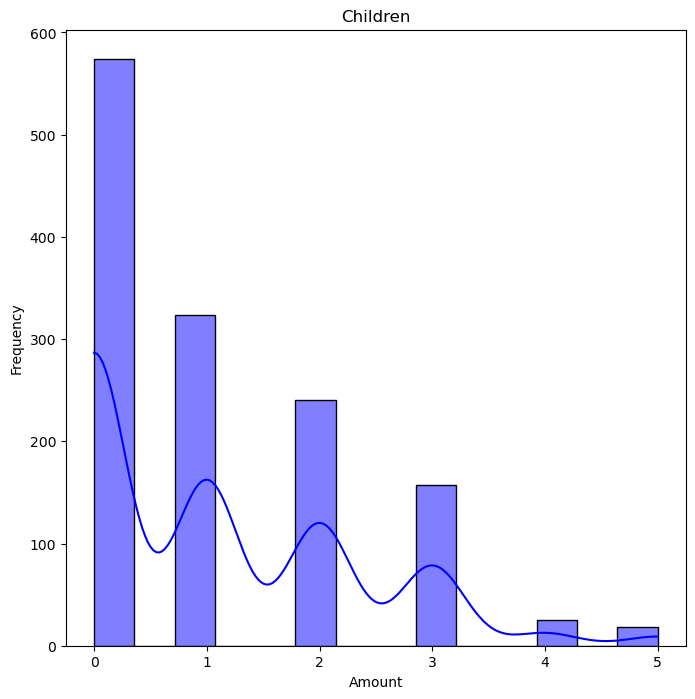

In [75]:
plt.figure(figsize=(8,8))
sns.histplot(df['children'], kde=True, color='blue')
plt.title('Children')
plt.xlabel('Amount')
plt.ylabel('Frequency')

In [76]:
skewnessval = df['children'].skew()
print('Skewnesss:', skewnessval)

Skewnesss: 0.9383804401702414


From the value 0.93 and most of the data being on the left, we can see that the data is once again right-skewed. Let's now implement the Box-Cox transformation to make the data more symmetrical.

In [77]:
children_boxcox, lam = boxcox(df['children'] + 1)
print("Optimal lambda for Box-Cox:", lam)

Optimal lambda for Box-Cox: -0.3662726593870495


This optional lambda value is a power that will give you the most normal version of our column. It works with this equation:
y = (x^λ - 1)/(λ)

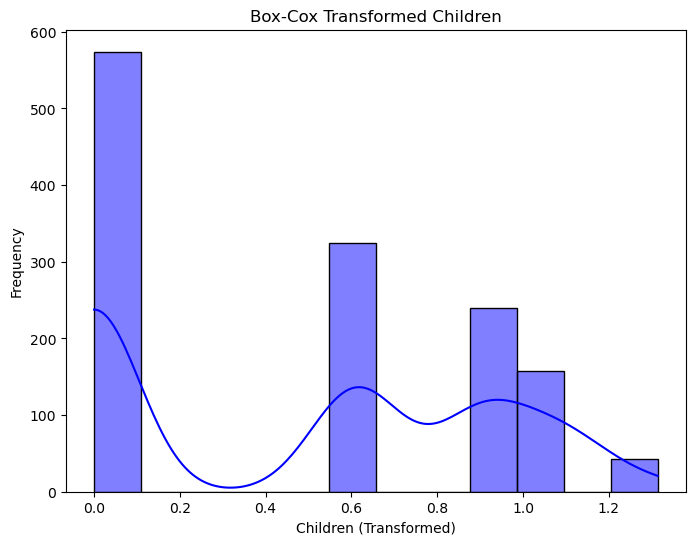

In [78]:
plt.figure(figsize=(8, 6))
sns.histplot(children_boxcox, kde=True, color='blue')
plt.title('Box-Cox Transformed Children')
plt.xlabel('Children (Transformed)')
plt.ylabel('Frequency')
plt.show()

As we can see, this data is much more symmetrical. Now we can finally normalize the data.

To normalize the data we will use the MinMaxScaler to make all the numeric data values from 0-1.

In [80]:
# First, let's get an initial description.
df.describe()

,age,bmi,children,charges,log_charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,9.098659
std,14.049960,6.098187,1.205493,12110.011237,0.919527
min,18.000000,15.960000,0.000000,1121.873900,7.022756
25%,27.000000,26.296250,0.000000,4740.287150,8.463853
50%,39.000000,30.400000,1.000000,9382.033000,9.146552
75%,51.000000,34.693750,2.000000,16639.912515,9.719558
max,64.000000,53.130000,5.000000,63770.428010,11.063045


In [88]:
# We will assign a scaler and transform the numeric columns.
cols = ['charges', 'bmi', 'children']
scaler = MinMaxScaler()
df[cols] = scaler.fit_transform(df[cols]) # Fit and transform the data
df.head()

,age,sex,bmi,children,smoker,region,charges,log_charges
0,19,female,0.321227,0.0,yes,southwest,0.251611,9.734176
1,18,male,0.479150,0.2,no,southeast,0.009636,7.453302
2,28,male,0.458434,0.6,no,southeast,0.053115,8.400538
3,33,male,0.181464,0.0,no,northwest,0.333010,9.998092
4,32,male,0.347592,0.0,no,northwest,0.043816,8.260197


This wraps up this project. We addressed skewness in the charges and children columns using log transformation and Box-Cox transformation. We made both columns more symmetrical and finally normalized all numeric variables to ensure that they are on the same scale (0-1).